# Gaussian Processes

----------------------------------------------------
Machine Learning    

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es*, *Emilio Parrado Hernández emipar@tsc.uc3m.es* and *Pablo M. Olmos olmos@tsc.uc3m.es*

----------------------------------------------------



Recommended Bibliography:

- [An introduction to Gaussian Processes](http://www.inference.org.uk/mackay/gpB.pdf), by David J.C. Mackay
- Chapter 6 of [Bayesian Reasoning and Machine Learning](http://web4.cs.ucl.ac.uk/staff/D.Barber/textbook/090310.pdf), David Barber, 2010
- Chapter 15 of Machine Learning: a probabilistic perspective, Kevin Murphy 2012
- [Gaussian Processes for Machine Learning](https://gaussianprocess.org/gpml/chapters/RW.pdf), by Carl Edward Rasmussen and Christopher K. I. Williams.

And these slides are really nice

-[A Tutorial on Gaussian Processes (or why I don’t use SVMs)](https://bigbird.comp.nus.edu.sg/pmwiki/farm/mlss/uploads/Site/lect1gp.pdf), by Zoubin Ghahramani

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Gaussian Processes for Regression

## 1.1 Gaussian Process definition

In the Bayesian linear regression you have learned a **probabilistic model** of the weight vector $\mathbf w$.  Now the idea is to propose a direct probabilistic model of the function $f(\mathbf x)$.
- Consider $f(\mathbf x)$ as a vector with any finite number of components: all the values $f(\mathbf x)$ for all possible $\mathbf x$ stacked one after the other

- All the elements of this vector $f(\mathbf x)$ are random variables and they follow a joint probability distribution
- Now assume this joint pdf is **Gaussian**. Therefore we can define it with its **two statistics**:
   - **mean** $\rightarrow$ mean function
   $$\mathbb E\{f(\mathbf x)\} = m(\mathbf x)$$
   Given an input $\mathbf x_i$ you can compute the mean of $f(\mathbf x_i)$ as $m(\mathbf x_i)$. One usually  takes $m(\mathbf x)=0$

  - **variance** $\rightarrow$ covariance function
$$\mathbb E\{(f(\mathbf x_i) - m(\mathbf x_i)) (f(\mathbf x_j) - m(\mathbf x_j))^{\top} \} = \kappa(\mathbf x_i, \mathbf x_j)$$

- In this case, $f(\mathbf x)$ is said to be a Gaussian Process and it is denoted as
$$ f(\mathbf x) \sim \mathcal{GP} \left(m(\mathbf x),\kappa(\mathbf x, \mathbf x_i) \right)$$


the output gona have a mean. Mean difference for echa of this input.
there is a covarince matrix: gonna be given by a kernel function.
The distribution gona be a GP

## 1.2 Drawing functions from a Gaussian Process

When we define a GP as
$$ f(\mathbf x) \sim \mathcal{GP} \left(m(\mathbf x),\kappa(\mathbf x, \mathbf x_i) \right)$$

we are saying that our vector of functions has multivariate Gaussian distribution prior with mean $m(\mathbf x)$ and covariance $\kappa(\mathbf x, \mathbf x_i)$. We can generate samples of this prior to obtain different realizations of our vector of functions and analyze how different prior configurations can generate different functions...

mean function ussually considered zero. Covariance the kernel. This GP gona be the prior. How the function of my model can behave (the GP provide us).
length scale: inverse of gamma.

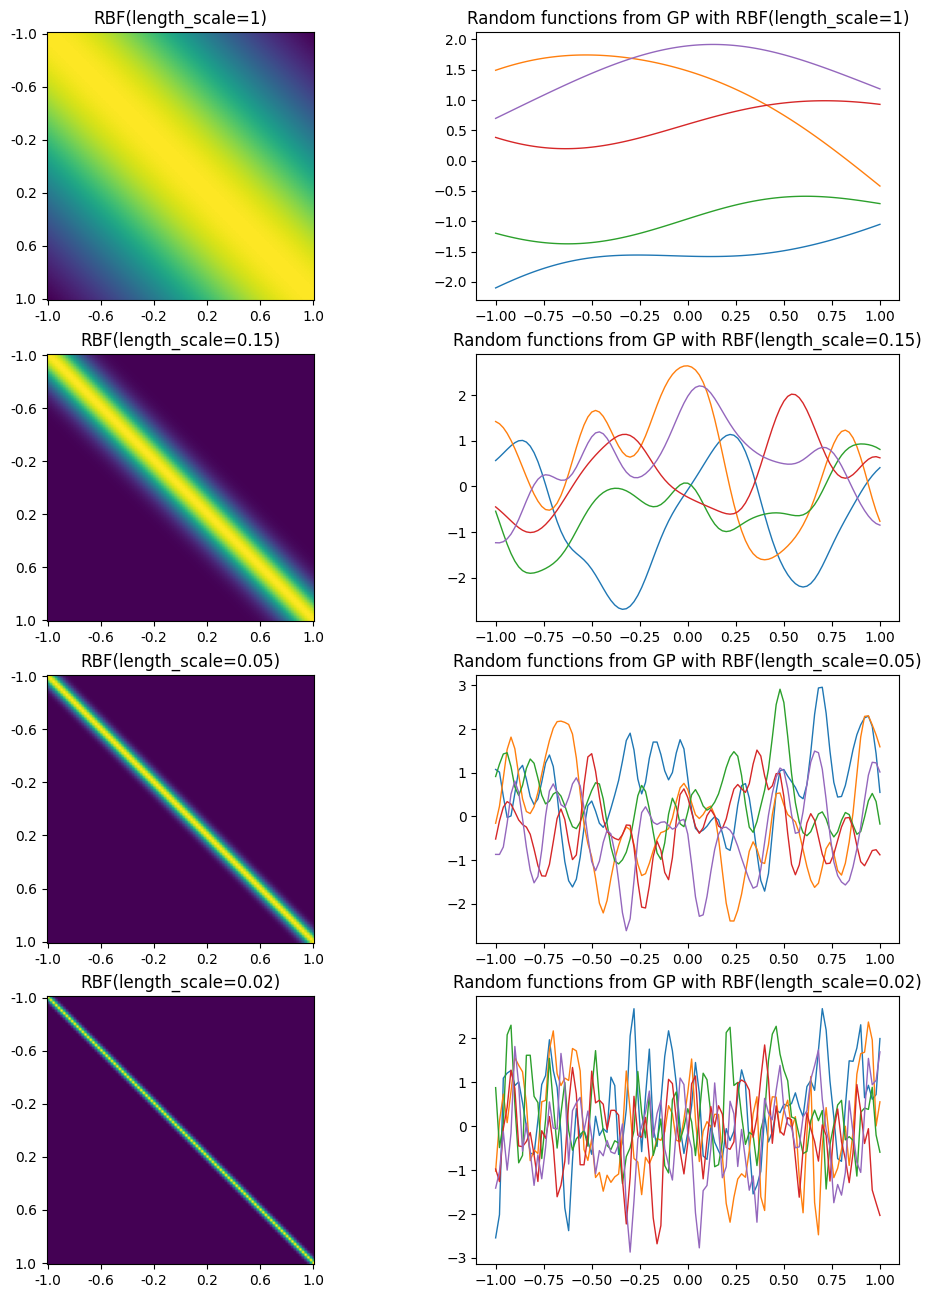

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF
fa, aa = plt.subplots(4,2,figsize=(12,16))
list_aa = [aa[0],aa[1],aa[2],aa[3]]


for ik,kernel in enumerate([
               RBF(length_scale=1.0),RBF(length_scale=.15),
                RBF(length_scale=.05),
                RBF(length_scale=.02)]):
  # We create differente GP with different covariance functions
  gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
  ak = list_aa[ik][0]
  xg = np.linspace(-1,1,101)[:,None]
  # Plot the kernel or covariance matrix over xg
  K = kernel(xg)
  ak.imshow(K)
  ak.set(xticks=np.arange(101)[::20], xticklabels=[-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
  ak.set(yticks=np.arange(101)[::20], yticklabels=[-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

  ak.title.set_text(str(kernel))
  # For the given observations, we generate different models (from the prior)
  yg = gpr.sample_y(xg, 5)
  ak = list_aa[ik][1]
  ak.plot(xg, yg, lw=1)
  ak.title.set_text('Random functions from GP with '+str(kernel))


my f(xg)= multidimensionalGP(0,k(xg,xg))

first figure --> el xg esta relacionado con los puntos de xg close.

second figure: point related when they are close --> less smooth

Note that the covariance function defines the expressivity of the model, smoother or with abrupt changes.

## 1.3 Bayesian Linear Model as a Gaussian Process

The Bayesian linear model we have seen above can be formulated as a GP. To do so, let us start by considering a model without noise, i.e.,

 $$f(\mathbf x) = \mathbf \phi(\mathbf x)^\top \mathbf w$$

where we have considered that $\mathbf w \sim \mathcal N(\mathbf 0, \Sigma_p)$.

Then, to define $f(\mathbf x)$ as a **Gaussian process** we need to specify its two statistics:

- **mean function**
$$ m(\mathbf x) = \mathbb E\{f(\mathbf x)\} =\mathbf \phi(\mathbf x)^\top \mathbb E\{\mathbf w\} = \mathbf 0
$$
- **covariance function**
$$\mathbb E\{(f(\mathbf x_i) - m(\mathbf x_i)) (f(\mathbf x_j) - m(\mathbf x_j))^{\top} \}
= \mathbb E\{f(\mathbf x_i) f(\mathbf x_j)^{\top}  \} =$$
$$ \mathbf \phi(\mathbf x_i)^\top \mathbb E\{\mathbf w\mathbf w^\top\} \mathbf \phi(\mathbf x_j) =\mathbf \phi(\mathbf x_i)^\top \Sigma_p \mathbf \phi(\mathbf x_j)  = \kappa(\mathbf x_i, \mathbf x_j) $$

remember the kernel in the Bayesian nonlinear regression model! So, we have that the non linear model is

$$ f(\mathbf x) \sim \mathcal{GP} \left(\mathbf 0,\kappa(\mathbf x, \mathbf x') \right)$$

This GP is jointly modelling $f(\mathbf x)$ and $f(\mathbf x')$  as a Gaussian distribution with zero mean and covariance given by $\kappa(\mathbf x, \mathbf x')$. And, we can extend this to $N$ points having that function values $f(\mathbf x_1), \ldots, f(\mathbf x_N)$ are jointly Gaussian.





### Example with non-linear regression

Let's recover the example of nonlinear bayesian regression

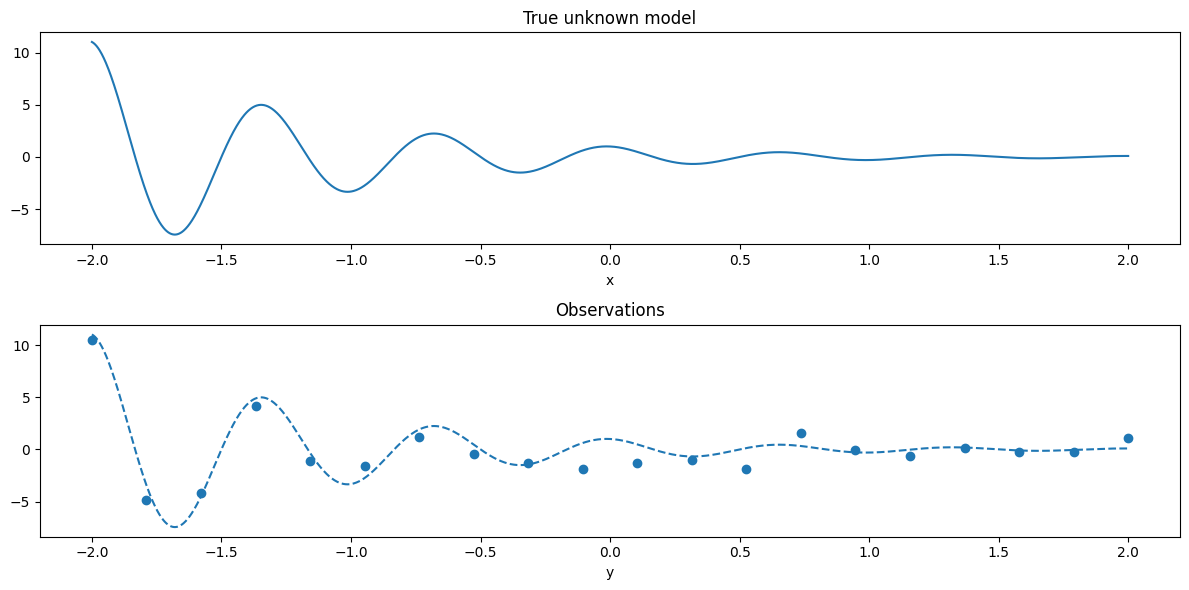

In [3]:
import random

# Uknown  generative model
def ff(x, a=1.2, b=3):
  return np.exp(-a*x)*np.cos(b*np.pi*x)

a = 1.2

# Example samples
n=20
x = np.linspace(-2,2,n)
# Data for plotting purposes
xg = np.linspace(-2,2,2000)

# Compute model outputs
y = ff(x)
yg = ff(xg)
s = 1 # Noise variance
y += np.array([random.gauss(mu=0, sigma=s) for ii in range(n)]) # Add noise over example samples
#my = np.mean(y)

fa, aa = plt.subplots(2,1,figsize=(12,6))
aa[0].plot(xg,yg,label='ff(x)')
aa[0].set_xlabel('x')
aa[0].set_title('True unknown model')
aa[1].scatter(x,y)
aa[1].plot(xg,yg,linestyle='--',label='underlying ff(x)')
aa[1].set_xlabel('x')
aa[1].set_xlabel('y')
aa[1].set_title('Observations')

fa.tight_layout()

And we will generate 100 training observations

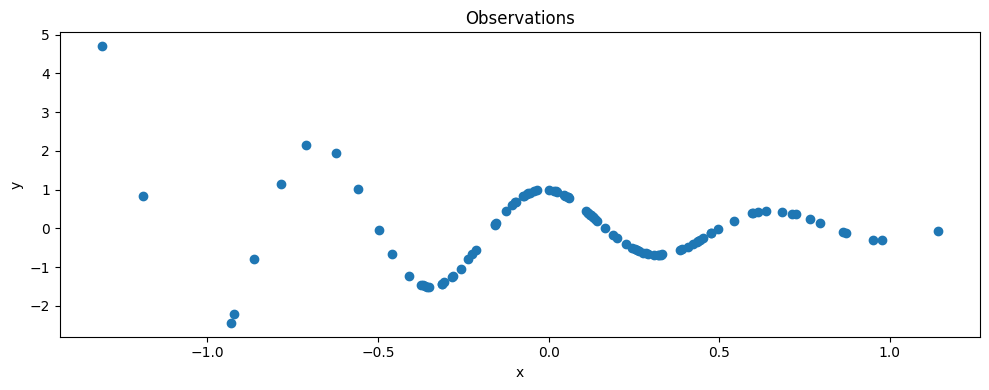

In [4]:
random.seed(42)
def get_ff_observation(ff):
  sigma_n = 0 #Free noise
  # Change the data generation to analize the predictive variance with uniform samples in the interval [-2,2] vs. no unifrom
  #x = random.uniform(-2,2)
  x = random.gauss(mu=0, sigma=0.5) # more samples around 0
  ee = random.gauss(mu=0, sigma=sigma_n)
  return x, ff(x) + ee


X=[]
Y=[]
for n in range(100):
  x,y = get_ff_observation(ff)
  X.append(x)
  Y.append(y)


plt.figure(figsize=(10,4))
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observations')
plt.tight_layout()

these are my training data

Now we define the prior of our GP, we are going to consider that it has zero mean and the covariance matrix is Gaussian with a gamma of 10

$$ f(\mathbf x) \sim \mathcal{GP} \left(\mathbf 0,\kappa(\mathbf x, \mathbf x') \right)$$
where
\begin{align}
k(\mathbf{x},\mathbf{x}') =  \exp \left( -\gamma ||\mathbf{x}-\mathbf{x}'||^2 \right)
\end{align}
with $\gamma =10$.

Then we know that this family of functions are going to have these shapes...

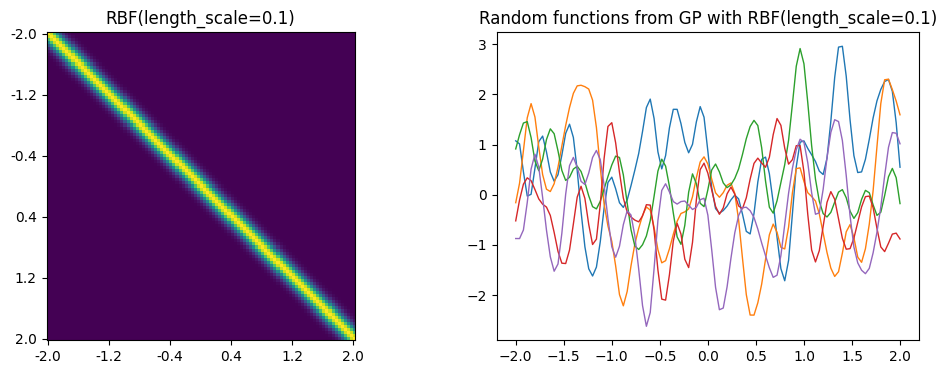

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF
fa, aa = plt.subplots(1,2,figsize=(12,4))

gamma =10.
kernel=RBF(length_scale=1./gamma)
# We create differente GP with different covariance functions
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
ak = aa[0]
xg = np.linspace(-2,2,101)[:,None]
# Plot the kernel or covariance matrix over xg
K = kernel(xg)
ak.imshow(K)
ak.set(xticks=np.arange(101)[::20], xticklabels=[-2. , -1.2, -0.4,  0.4,  1.2,  2. ])
ak.set(yticks=np.arange(101)[::20], yticklabels=[-2. , -1.2, -0.4,  0.4,  1.2,  2. ])

ak.title.set_text(str(kernel))
# For the given observations, we generate different models (from the prior)
yg = gpr.sample_y(xg, 5)
ak = aa[1]
ak.plot(xg, yg, lw=1)
ak.title.set_text('Random functions from GP with '+str(kernel))

We know that of all the possible functions we have, the one that corresponds to our model has generated this data.....



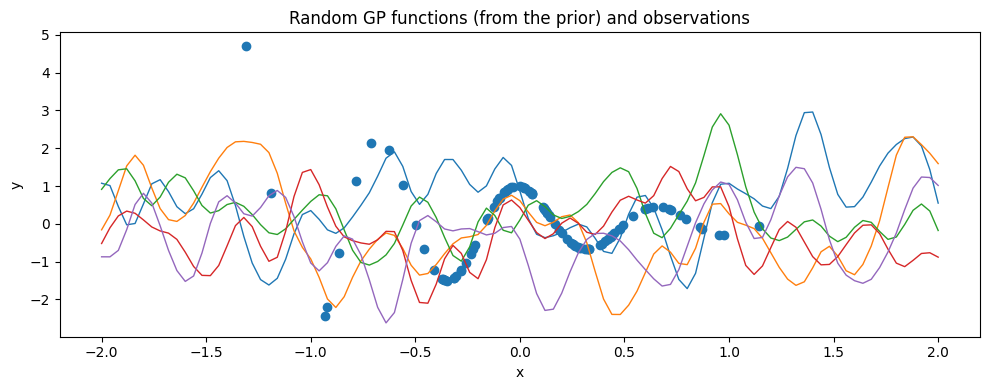

In [6]:
plt.figure(figsize=(10,4))
plt.plot(xg, yg, lw=1)
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random GP functions (from the prior) and observations')
plt.tight_layout()

I can sample the prior's more functions...

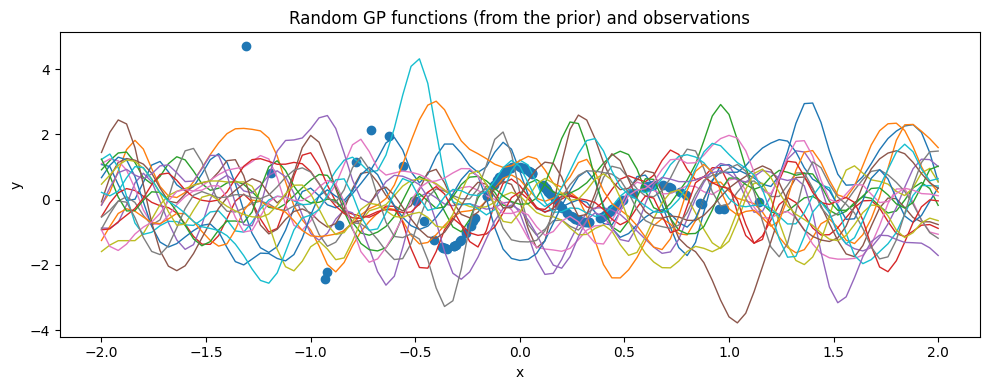

In [7]:
# For the given observations, we generate different models (from the prior)
yg = gpr.sample_y(xg, 20)
plt.figure(figsize=(10,4))
plt.plot(xg, yg, lw=1)
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random GP functions (from the prior) and observations')
plt.tight_layout()

I can get more functions of my prior

quiero saber qué función ha generado mi data (los puntos azules)

My goal is to know which of these has generated my observations, so that I can then make predictions on the new x values (in my test data).

It is clear that the fact that we have all these training samples is giving us information that we have to use...





The GP definition tells us that the  output values of $f()$ are distributed as a multidimensional Gaussian, so we know that the values of $f$ in the training samples and at those points we don't know are going to have this joint distribution. To define this, let's consider that we have these data sets:
- **Training observations**: $X$, data matrix, size $N\times D$, one observation per row; $\mathbf y$, vector with corresponding observed targets. Now, let's consider that the model output is **noise free** $\mathbf y = \mathbf f(X)$
- **Test observations**: $X_t$, test data matrix, size $N_t\times D$. We want to find out $\mathbf f_t$, vector of predictions with the outputs for all the rows of $X_t$

So, the GP defition is telling us that the joint distribution of these observations is
$$
p\left(\left[\begin{array}{c}\mathbf f\\\mathbf f_t \end{array}\right]\right) = \mathcal N\left( \left[\begin{array}{c}\mathbf m(X)\\\mathbf m(X_t) \end{array}\right],  \left[\begin{array}{cc} K(X,X) & K(X,X_t) \\ K(X_t,X) & K(X_t,X_t)\end{array}\right]\right )
$$



If we already know that $\mathbf f(X) = \mathbf y$, how can I use this information to refine our knowledge about the distribution of $f()$ over the test data, $p(\mathbf f_t)$?

p(f_t|f) --> using the the joint distribution

**Solution**: compute the posterior of $\mathbf f_t$ given $\mathbf f(X)$, i.e., compute the predictive distribution!!!

## 3.4 Predictive distribution

### 3.4.1. Noise free case

Given that the joint distribution of $\mathbf f = \mathbf f(X)$ and $\mathbf f_t =\mathbf f(X_t) $  is
$$
p\left(\left[\begin{array}{c}\mathbf f\\\mathbf f_t \end{array}\right]\right) = \mathcal N\left( \left[\begin{array}{c}\mathbf m(X)\\\mathbf m(X_t) \end{array}\right],  \left[\begin{array}{cc} K(X,X) & K(X,X_t) \\ K(X_t,X) & K(X_t,X_t)\end{array}\right]\right )
$$

The predictive distribution is the distribution of $\mathbf f_t$ given $\mathbf f$ is:
$$
p(\mathbf f_t | X_t,X,\mathbf f) = \mathcal N(\mathbf m(X_t)+K_t^\top K ^{-1}(\mathbf f-\mathbf m(X)), K_{tt}-K_t^\top K^{-1} K_t)
$$

there are no parameters to learn. We don't need the fit function, because we have everything in the distribution

#### Example

In [8]:
def pinta_gp_predictive_distribution(X, Y, kernel,gamma=1.0):

  N = len(Y)
  Ng=200
  xg = np.linspace(-2,2,Ng)#point that I gona compute the output

#compute the predictive distribution of my model
  X1 = X.reshape(-1,1)#training data
  KK = kernel(X1,gamma=gamma)
  iK = np.linalg.inv(KK+1e-4*np.eye(N))

  Xg1 = xg.reshape(-1,1)
  Kt = kernel(Xg1, X1, gamma)
  Ktt = kernel(Xg1, Xg1, gamma)

  my = Kt.dot(iK).dot(Y.reshape(-1,1)).flatten() #mean

  Sy = Ktt - Kt.dot(iK).dot(Kt.T) #covariance
  sy = np.sqrt(np.diag(Sy))#variance of each test data that why we apply the diagonal
  fa, ak = plt.subplots(1,1,figsize=(12,4))
  ak.plot(xg,my,label='mean')
  ak.plot(xg,my+sy,label='1std',linestyle='--',color='pink')
  ak.plot(xg,my-sy,linestyle='--',color='pink')
  ak.fill_between(xg, my-sy, my+sy,alpha=0.3,color='pink')
  ak.scatter(X,Y,marker='x',label='observations')
  ak.set_title('Predictive Distribution')
  ak.legend()
  fa.tight_layout()

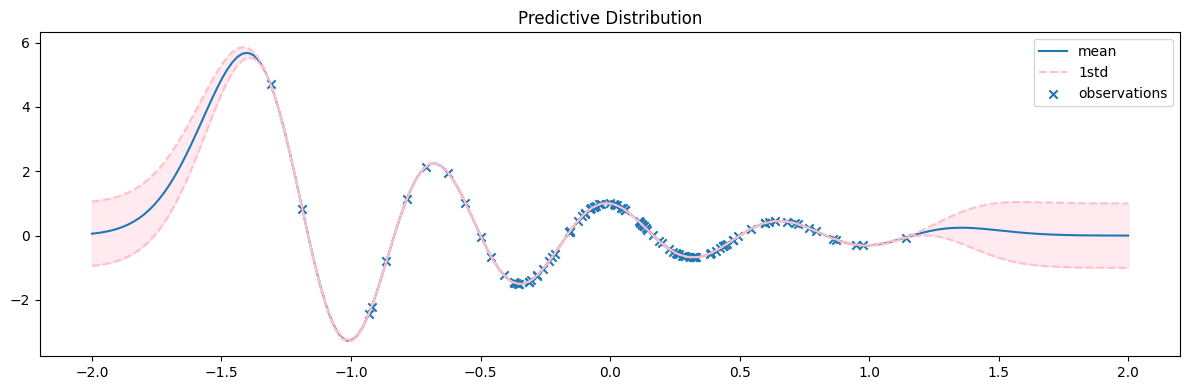

In [9]:
from sklearn.metrics.pairwise import rbf_kernel
pinta_gp_predictive_distribution(np.array(X), np.array(Y), rbf_kernel,gamma=10)

Here we are considering that our observations have no noise and therefore the estimation of the predictive standard deviation is zero. Let us modify the model to include the noise that is usually present in our observations.

## 3.5 Gaussian Process with noisy observations
Now we incorporate added noise to the data generation model
$$
y = f(\mathbf x) + \epsilon \qquad \epsilon \sim \mathcal N(0,\sigma_n^2)
$$


To define a **Gaussian Process** for the observations $y$, we need to specify its two statistics
-  **mean function**
$$ m(\mathbf x) = \mathbb E\{y(\mathbf x)\} =\mathbb E\{f(\mathbf x) + \epsilon\} = \mathbf 0
$$
we have considered $\mathbb E\{f(\mathbf x)\} =\mathbf 0$.
- **covariance function**
$$\mathbb E\{(y_i y_j\}
= \mathbb E\{(f(\mathbf x_i) + \epsilon_i) (f(\mathbf x_j) + \epsilon_j) \} =$$
$$ \mathbb E\{f(\mathbf x_i) f(\mathbf x_j)  \} + \sigma_n^2\delta_{ij} =\kappa(\mathbf x_i, \mathbf x_j) + \sigma_n^2\delta_{ij}$$
where $\delta_{ij}$ is a Kronecker delta which is one iff $i = j$ and zero otherwise.



### Predictive function, noisy case

With the mean and covariance function of the Gaussian Process we can reconstruct the mean and covariance of the joint distribution of the observations
$$
p\left(\left[\begin{array}{c}\mathbf y\\\mathbf f_t \end{array}\right]\right) = \mathcal N\left( \left[\begin{array}{c}\mathbf m(X)\\\mathbf m(X_t) \end{array}\right],  \left[\begin{array}{cc} K(X,X) + \sigma_n^2\mathbf I & K(X,X_t) \\ K(X_t,X) & K(X_t,X_t)\end{array}\right]\right )
$$

The predictive distribution is the conditional
$$
p(\mathbf f_t | X_t,X,\mathbf y) = \mathcal N(\mathbf m(X_t)+K_t^\top (K+ \sigma_n^2\mathbf I)^{-1}(\mathbf y-\mathbf m(X)), K_{tt}-K_t^\top (K+ \sigma_n^2\mathbf I)^{-1} K_t)
$$
Remarks for the zero mean case
- $\mathbf m(\mathbf f_t) = K_t^\top (K+ \sigma_n^2\mathbf I)^{-1}\mathbf y$ is a linear combination of the observations $\mathbf y$ (it is a linear predictor). We can rewrite this equation as a linear combination of $N$ kernel functions, each one centered on a training point,
$$\mathbf m(\mathbf f_t) = \sum_{i=1}^N \alpha_n \mathbf k(\mathbf x_i, X_t)$$
where $\alpha_n = (K+ \sigma_n^2\mathbf I)^{-1} y_n$. Remember the Representer Theorem.
- The covariance $K_{tt}-K_t^\top (K+ \sigma_n^2\mathbf I)^{-1} K_t$ **does not depend on the targets**, just on how close is $\mathbf x_t$ from the training observations (distance measured through the kernel function).

In the same way as for the Bayesian regression model, we can work with the predictive distribution of $y_t$ in which only the covariance term changes and becomes $K_{tt}-K_t^\top (K+ \sigma_n^2\mathbf I)^{-1} K_t + \sigma_n^2$.


The use of GP has been limited for large dataset  because we need to apply the Kernel between all the trainig data and compute the inverse!!!!!!!!!!!!


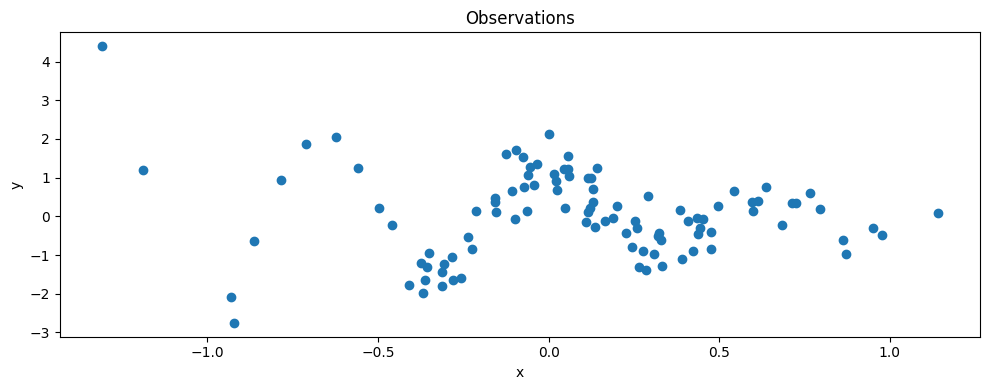

In [10]:
random.seed(42)
def get_ff_observation(ff):
  sigma_n = 0.5 #Free noise
  # Change the data generation to analize the predictive variance with uniform samples in the interval [-2,2] vs. no unifrom
  #x = random.uniform(-2,2)
  x = random.gauss(mu=0, sigma=0.5) # more samples around 0
  ee = random.gauss(mu=0, sigma=sigma_n)
  return x, ff(x) + ee


X=[]
Y=[]
for n in range(100):
  x,y = get_ff_observation(ff)
  X.append(x)
  Y.append(y)


plt.figure(figsize=(10,4))
plt.scatter(X,Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observations')
plt.tight_layout()

In [11]:
def pinta_gp_noise_predictive_distribution(X, Y, kernel,gamma=1.0, sigma_n=1.0):

  N = len(Y)


  Ng=200
  xg = np.linspace(-2,2,Ng)

  sn2 = sigma_n ** 2
  X1 = X.reshape(-1,1)
  KK = kernel(X1,gamma=gamma)
  iK = np.linalg.inv(KK + sn2*np.eye(N))

  Xg1 = xg.reshape(-1,1)
  Kt = kernel(Xg1, X1, gamma)
  Ktt = kernel(Xg1, Xg1, gamma)

  my = Kt.dot(iK).dot(Y.reshape(-1,1)).flatten()

  Sy = Ktt - Kt.dot(iK).dot(Kt.T)
  sy = np.sqrt(np.diag(Sy) + sn2) # the standard desvitation of my noisy model!!!!
  fa, ak = plt.subplots(1,1,figsize=(16,4))
  ak.plot(xg,my,label='mean')

  plt.plot(xg,my+1.96*sy,label='2std',linestyle='--',color='pink')
  plt.fill_between(xg, my-2*sy, my+2*sy,alpha=0.1,color='pink')
  plt.plot(xg,my-1.96*sy,linestyle='--',color='pink')

  plt.plot(xg,my+sy,label='1std',linestyle='--',color='red')
  plt.fill_between(xg, my-sy, my+sy,alpha=0.3,color='pink')
  plt.plot(xg,my-sy,linestyle='--',color='red')


  ak.scatter(X,Y,marker='x',label='observations')
  ak.set_title('Predictive Distribution of $y_t$')
  ak.legend()
  fa.tight_layout()

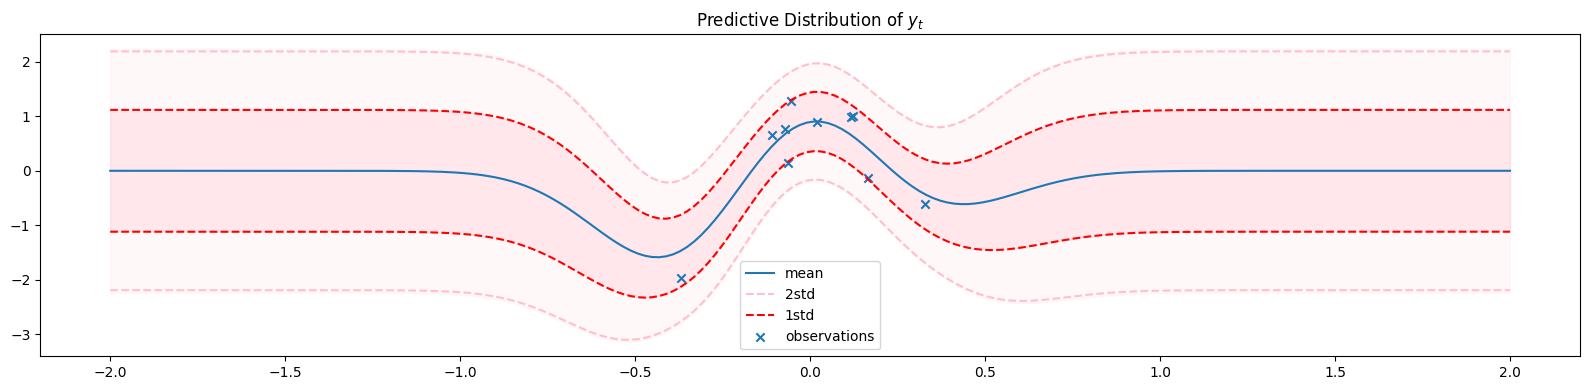

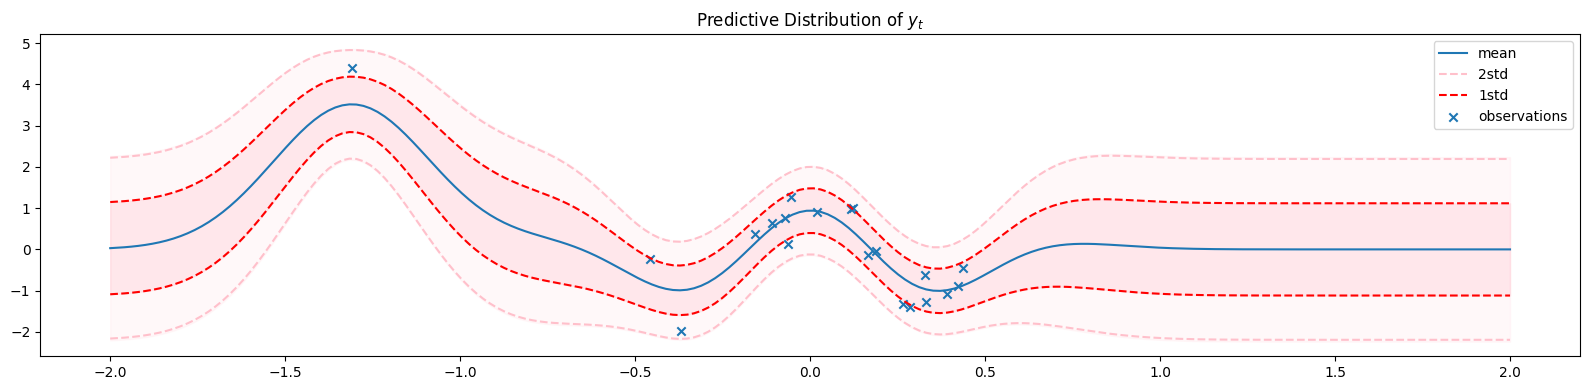

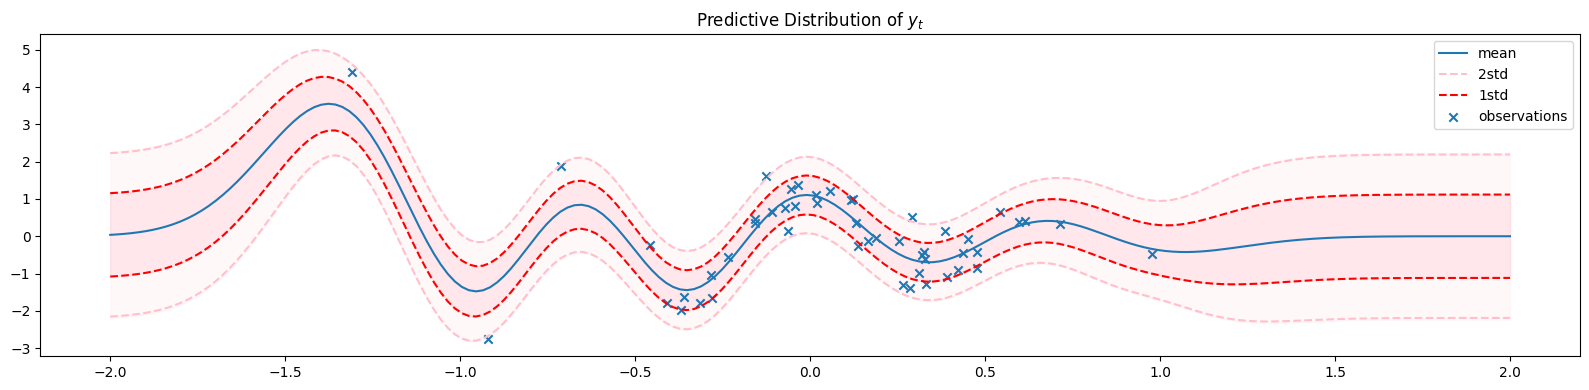

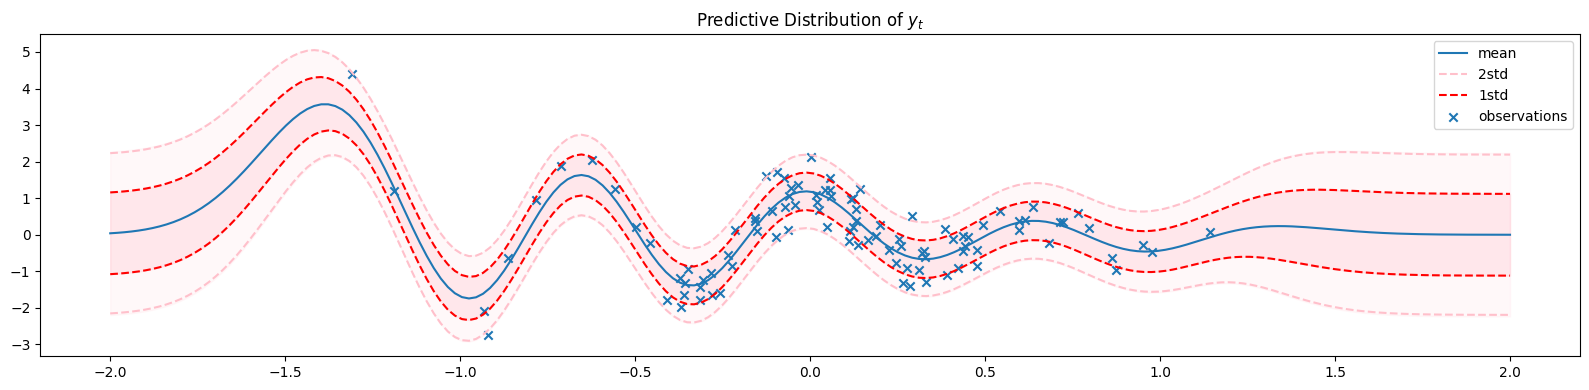

In [12]:
# Run for different number of data
for ii in [10,20,50,100]:
  pinta_gp_noise_predictive_distribution(np.array(X[:ii]), np.array(Y[:ii]), rbf_kernel,gamma=10, sigma_n=0.5)

#run the model with different training data
#moe data, we can define better our posterior

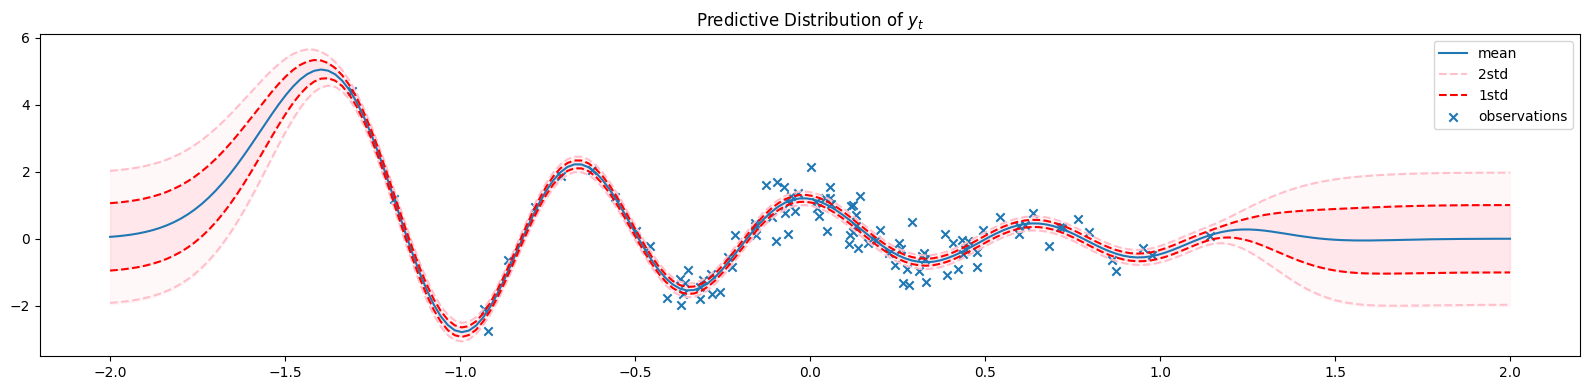

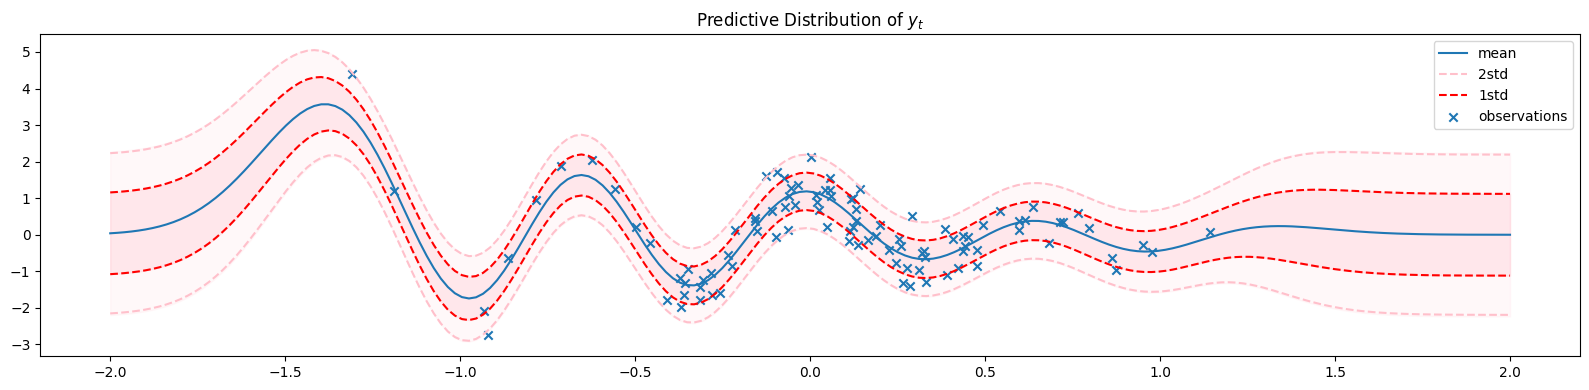

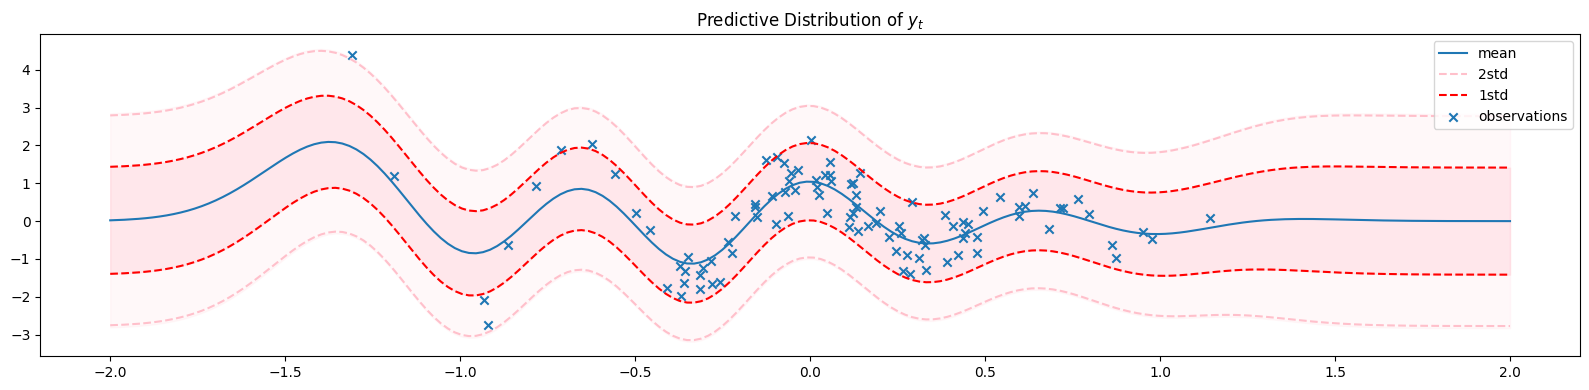

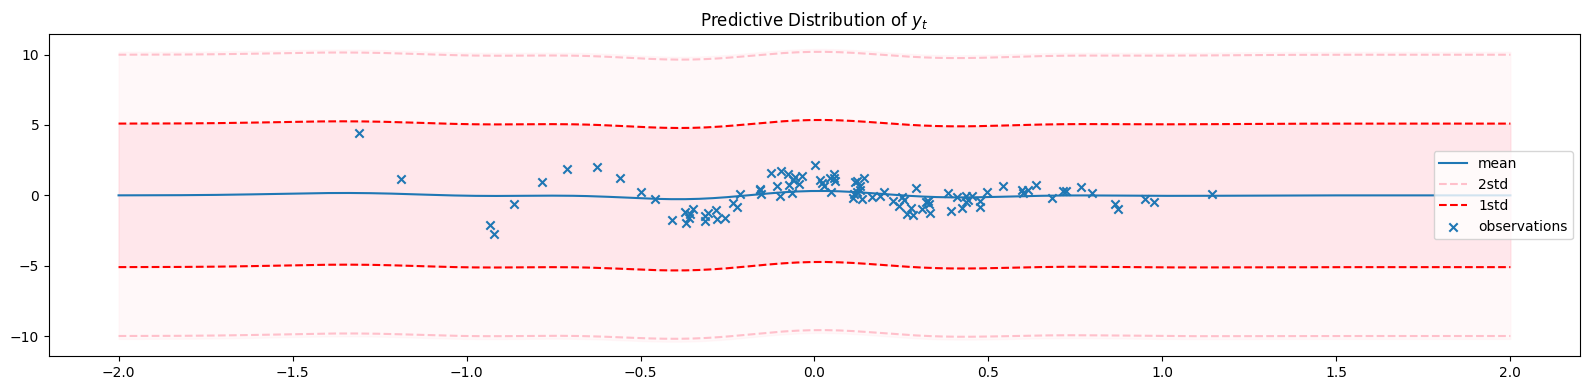

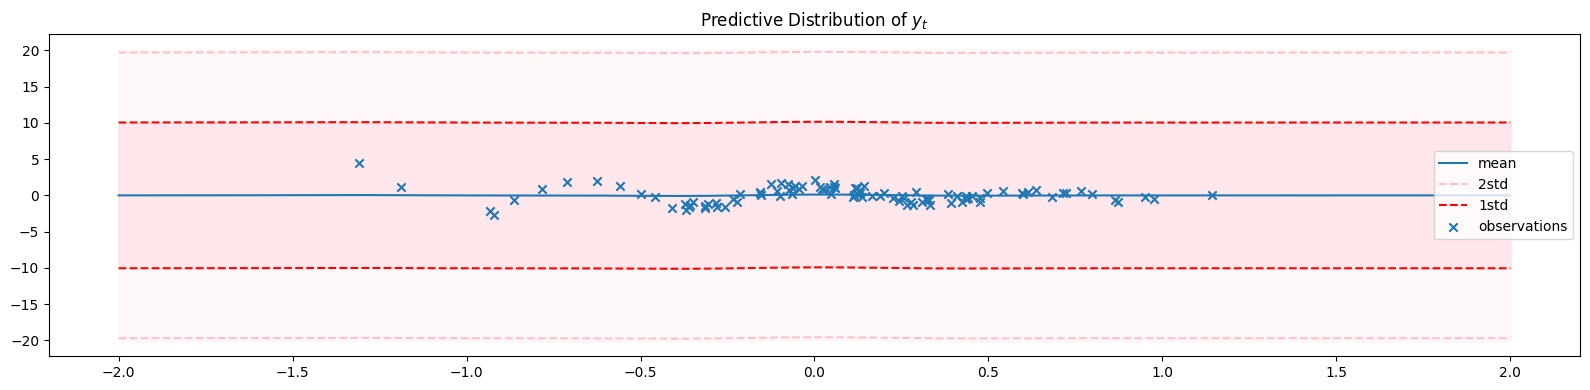

In [13]:
# Run for different noise
for sig in [0.1, 0.5, 1., 5., 10.]:
  pinta_gp_noise_predictive_distribution(np.array(X), np.array(Y), rbf_kernel,gamma=10, sigma_n=sig)
#if we increase the value of the noise, no matter you have a lot of data you believe in your data, not in your data

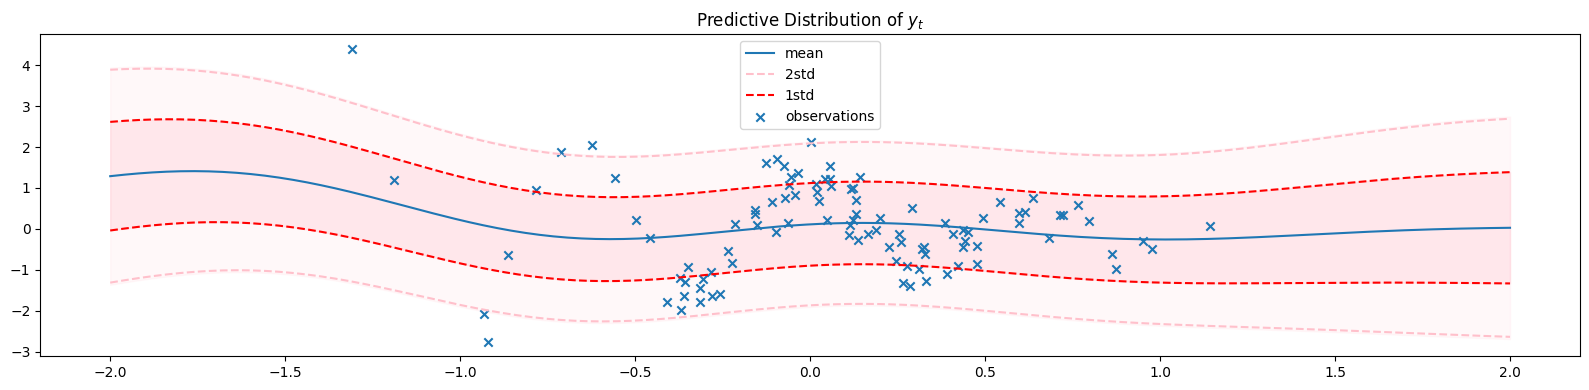

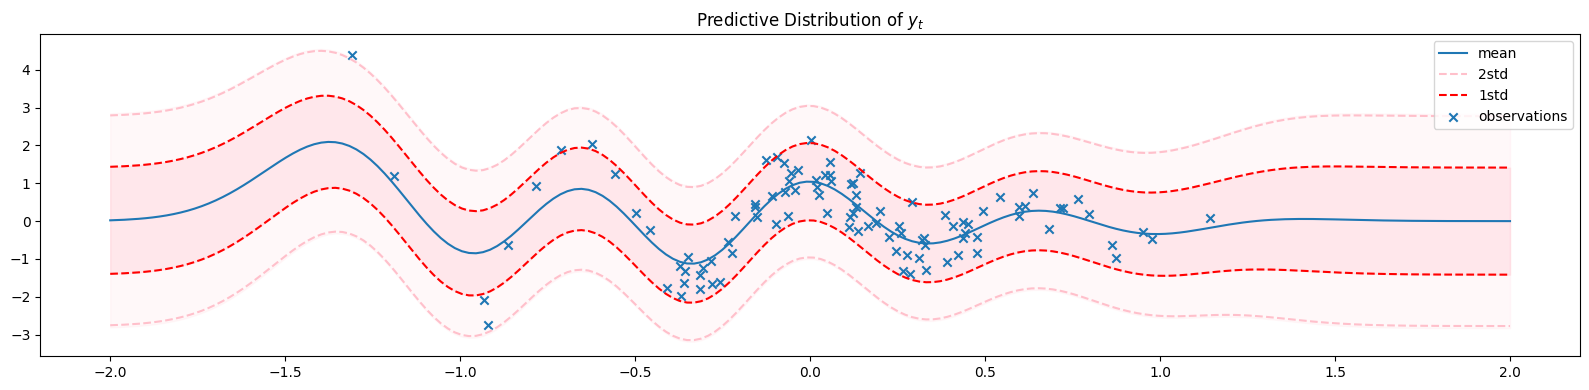

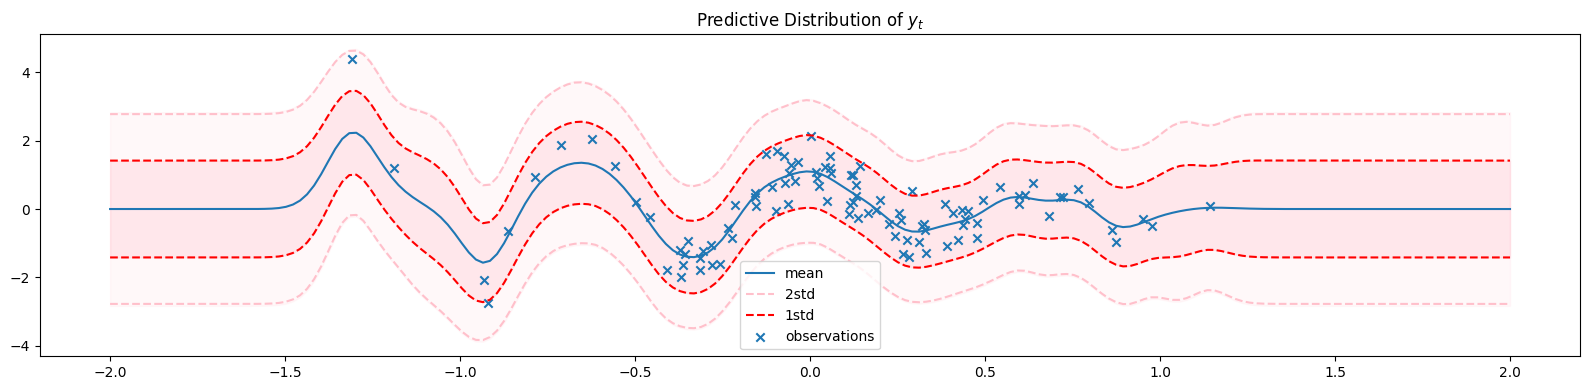

In [14]:
for gam in [1, 10, 100]:
  pinta_gp_noise_predictive_distribution(np.array(X), np.array(Y), rbf_kernel,gamma=gam, sigma_n=1.)

there are hyperparameters: gamma, noise, kernel --> gridsearch or a probabilistic way (define a prior of these hyperparameter and estimate the values, but if you do this you won't have an analitic appoach. The way is the likelihood p(y|x,sigma**2,gamma))

Here, we can play with different values of the hyperparameters, not only for $\sigma^2$, but also for the kernel parameters; you can play with the previous code to check the influence of $\gamma$ over the predictive function. It is clear that we need to learn their values accurately to obtain a good model performance.

## 3.6 Learning the model hyperparameters

In general a full Bayesian model selection involves the calculus of three usually non-tractable integrals, so one must need to resource to approximations and Monte Carlo Methods.

However, in the case of GPs (as for the linear bayesian regression model) we can maximize the model evidence.

- Evidence: marginal likelihood of the observations
$$
p(\mathbf y|X,\theta) = \mathcal N(\mathbf 0, K_{\theta}(X,X) + \sigma_n^2\mathcal I) = \mathcal N(\mathbf 0, K_y(\theta))
$$
- log of the evidence
$$
\log p(\mathbf y|X,\theta) = -\frac{N}{2}\log(2\pi)-\frac{1}{2}\log(|K_y(\theta)|)-\frac{1}{2}\mathbf y^\top K_y(\theta)^{-1}\mathbf y
$$
- $\frac{\partial}{\partial \theta} \log p(\mathbf y|X)$ and use gradient descent
$$
\frac{\partial}{\partial \theta} \log p(\mathbf y|X) = \frac{1}{2}\mathbf y^\top K_y(\theta)^{-1}\frac{\partial K_y}{\partial \theta}K_y(\theta)^{-1}\mathbf y - \frac{1}{2}\mbox{trace}\left(K_y(\theta) ^{-1} \frac{\partial K_y}{\partial \theta}\right)
$$
$$
= \frac{1}{2}\mbox{trace}\left( (\mathbf a \mathbf a^{\top} -K_y(\theta) ^{-1}) \frac{\partial K_y}{\partial \theta}\right)
$$ where $\mathbf a = K_y(\theta) ^{-1}\mathbf y$



 It takes $O(n^3)$ time to compute $K_y^{-1}$ and $O(n^2)$ time per hyperparameter to compute the gradient.


Note that, alternatively, one could use grid search with crossvalidation.

## 3.7 Decision Theory for GP regression

Up to this moment we have used GP theory to learn a predictive distribution for the posterior of the function $f$. But most of the time you final output has to be a particular estimator $y=f(x)$, i.e., your output can't be a probability distribution, but rather a deterministic function.

In this point we resource to decision theory and use a **loss function** to incorporate domain knowledge in the evaluation of the performance of the estimators. Examples of this loss function can be the **mean square error** or  the **mean absolute error**, or their normalised versions
$$
l(f(\mathbf x), y) = (f(\mathbf x) - y)^2
$$
The loss function defines an expected risk, which is the expectation of the loss function along the probability data distribution

$$
R_l(\mathbf x, y) = \int{l(f,y_t)p(y_t|X,X_t)dy_t}
$$

The output is that estimator that **minimises the expected risk**. For instance with a MSE loss function the optimal estimator is the **expectation** of $p(\mathbf y_t|X,X_t)$ while for a MAE loss the optimal estimator is the **median** of that distribution.

In case of working with Gaussian predictive distributions, both the mean and the median are at the same point of the distribution, so one usually uses the mean of the predicitve function to make the estimations.

single value --> **MAP**
I can provide too how confidence I am---> **ADVANTAGE**



# 4. Gaussian Processes in Scikit Learn

Sklearn brings its own implementation of [Gaussian Processes](https://scikit-learn.org/stable/modules/gaussian_process.html). Now you will go through a simple example to explore its basic functionalities.

First write down the imports and generate data.

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

from matplotlib.colors import LogNorm


To create a GP model in sklearn, you have to follow two steps:
1. Create the **kernel** (covariance function of the GP). Remember from kernel methods that the sum of kernels is a kernel. In sklearn, the noise model is absorbed by the model kernel, so you have to create the kernel as the sum of:
- The basic kernel, for instance, a [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF) kernel with initial `length_scale`. Notice the role of the parameter `length_scale` is different to that of `gamma` in the implementation for the SVM. This kernel is usually multiplied by a constant (which is also learned) to give more flexibility to the model.
- [White noise kernel](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.WhiteKernel.html#sklearn.gaussian_process.kernels.WhiteKernel) with `noise_level`.
2. Use `.fit()` to train the model. This training means learning the model parameters (starting from your initialized values).

3. Obtain predictions with `.predict()`. This function has different configurations to either return or not the predictive covariance.


Here you can find more information about the use of [kernels](https://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels) within GPs.



### Basic example of use and estimation of confidence interval

We start by generating a problem without noise

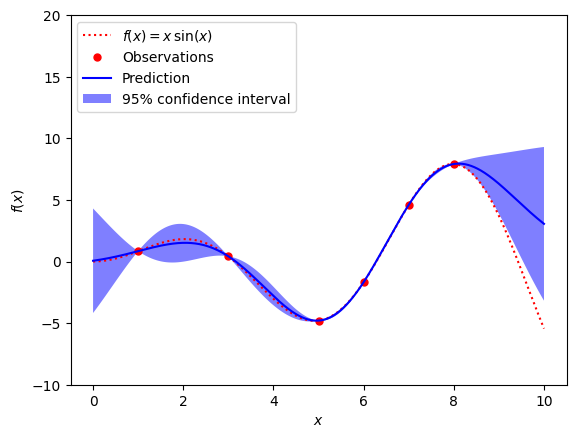

In [16]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10) #n_restarts_optimizer: repeat the proccess and select the MSE

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

Now we generate a problem with noise. Note how the data generation changes and how we have modified the kernel generation.

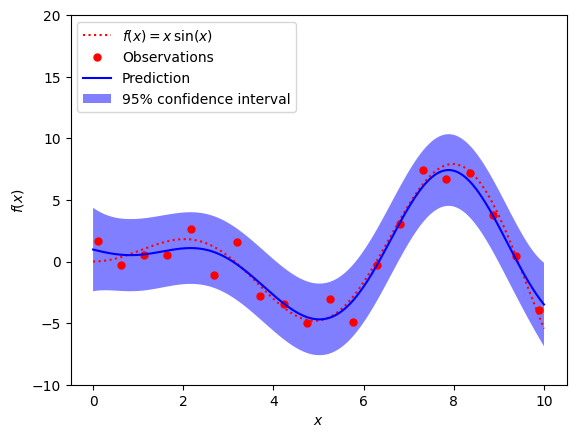

In [17]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise

np.random.seed(1)
y = f(X).ravel()
#dy = 1#0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, 1, size=y.shape)
y += noise

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

### Example of learning model parameters

Consider the following estimation problem and complete the following exercises, discussing the solutions

In [18]:
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])


### Exercise 5

Create and train a GP with a RBF covariance matrix using a initial  `length_scale` of 100 (do not forget to add a multiplying constant to this term) and `noise_level` of 1.

Save this model in class called `gp` so that next cell code can plot the predictive distribution of your model.

In [19]:
#<SOL>
kernel = 1.0 * RBF(100, (1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)
#</SOL>

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10)

Plot the predictive distribution

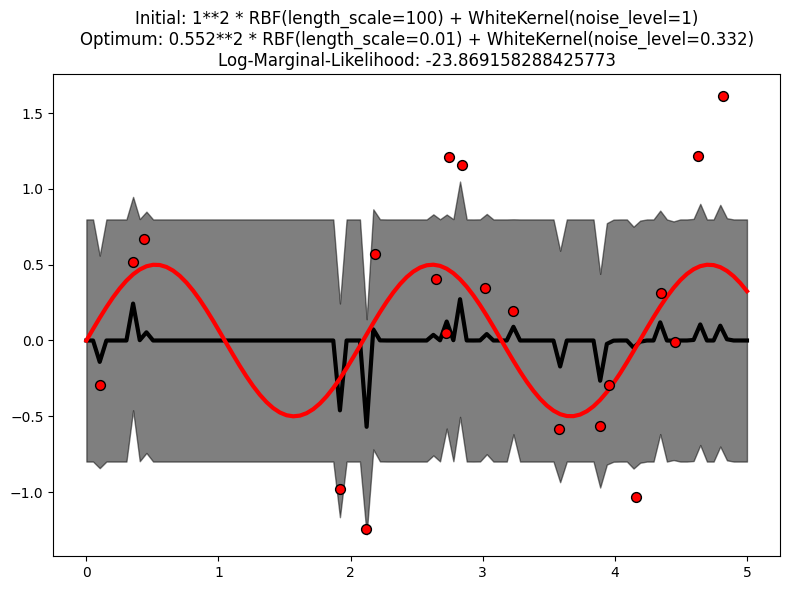

In [20]:
# First run
plt.figure(figsize=(8,6))

X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9)
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()


### Exercise 6

Repeat the Exercise 5 initializing the model with a  `length_scale` of 1 (and `length_scale_bounds=(1e-2, 1e3)`) and `noise_level` of $10^{-5}$. Again, save the model in class called `gp` so that you can plot the predictive distribution of your model.


In [21]:
# <SOL>
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e3)) + WhiteKernel(noise_level=10**(-5), noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# </SOL>

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
                         n_restarts_optimizer=10)

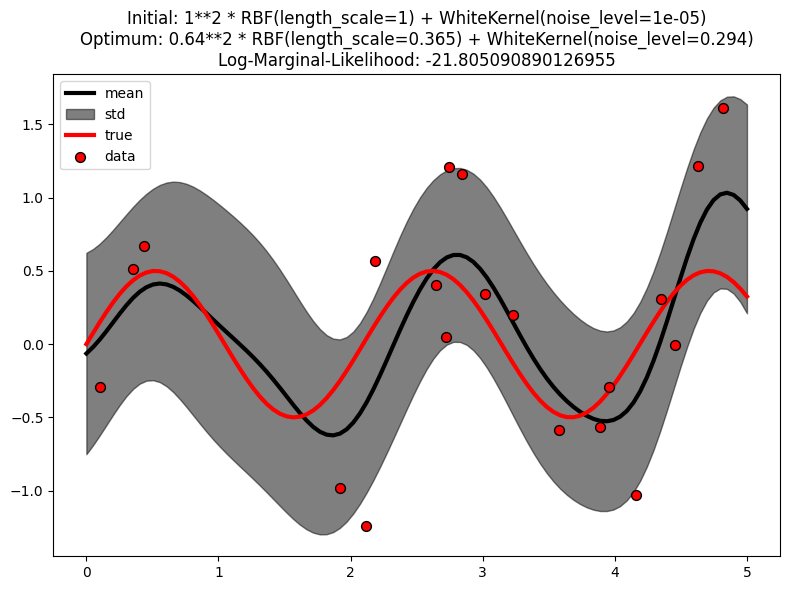

In [22]:
# Second run
plt.figure(figsize=(8,6))

X_ = np.linspace(0, 5, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label='mean')
plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                 y_mean + np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k',label='std')
plt.plot(X_, 0.5*np.sin(3*X_), 'r', lw=3, zorder=9,label='true')
plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0),label='data')
plt.title("Initial: %s\nOptimum: %s\nLog-Marginal-Likelihood: %s"
          % (kernel, gp.kernel_,
             gp.log_marginal_likelihood(gp.kernel_.theta)))
plt.tight_layout()
_=plt.legend()

### Exercise 7

Compare both solutions and analyze their differences. Note that the tithle of the predictive function includes the final model (with the learnt parameters). Besides, to help you with this analysis, next cell code plots the surface of the likelihood of the observations as you vary the parameters `noise_level` and `length_scale`.

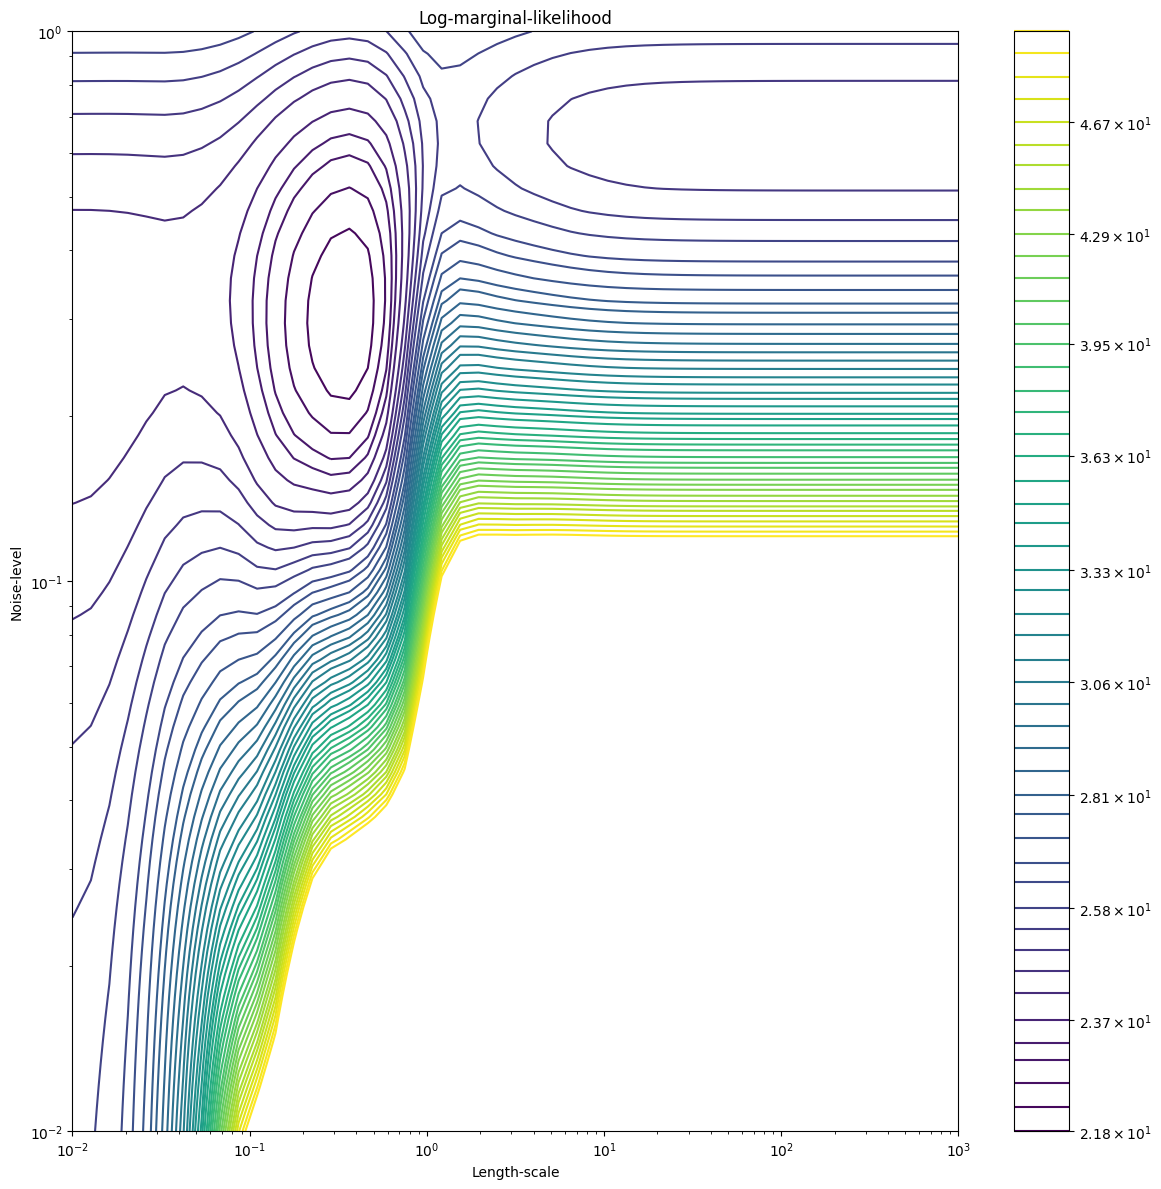

In [23]:
# Plot LML landscape
plt.figure(figsize=(12,12))
theta0 = np.logspace(-2, 3, 49)
theta1 = np.logspace(-2, 0, 50)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp.log_marginal_likelihood(np.log([0.36, Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T

vmin, vmax = (-LML).min(), (-LML).max()
vmax = 50
level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
plt.contour(Theta0, Theta1, -LML,
            levels=level, norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Length-scale")
plt.ylabel("Noise-level")
plt.title("Log-marginal-likelihood")
plt.tight_layout()

plt.show()

#<SOL>
Case 1. In this case the white noise component dominates in the kernel, therefore the predictive distribution resembles the prior (0 mean, and noise level estimated with the data)

Case 2. In this case the posterior predictive distribution depends on the observations, since the noise level reaches below the amplitude of the RBF part.

#</SOL>

dos maximos (los circulos). el circulo más a la derecha es la primera (la peor). Important part the initialization of the parameters.